# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

The dollar (USD) is the currency most widely used in international transactions. Therefore data on the exchange rate is important in trading activities. The dollar rate was obtained from the website www.exchange-rates.org, a website that provides accurate exchange rate information for more than 18 years using web scraping-a method of data collection by extracting specific data on a number of web pages.

We can scrape one of the tables available on the website, namely 'the USD to IDR data table for the last six months'. After that, it is visualized to make it easier for readers to get insight quickly and efficiently.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Based on inspecting results on the 'USD to IDR History for Last 6 Months' table on the web page. The data is tabulated in the `table` as the first tag with a class or key `data-rate-history`. We can pass this variable as a parameter to `find()`.

In [5]:
table = soup.find('table', attrs={'class':"history-rates-data"})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


From the data above, the contents of the table can be found by extracting each row using the parameter `tr` and `td` for each column

In [6]:
tr = table.find_all('tr')
print(tr[:2])

[<tr>
<th class="ltr-bidi-fix">Date</th>
<th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
</tr>, <tr>
<td>
<a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">May 12, 2023</a>
<a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">2023-5-12</a>
</td>
<td>
<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,844</span></span>
<span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>14,844</span></span>
</td>
</tr>]


Following the results
- Tabel history-rates-data
    * 1st row, 1st column : Date
    * 1st row, 2nd column : Exchange Rate

to extract the repeatable spesific information such as date and exchange rate. We can use `find_all` to get specific information for a particular tag.   

- Date information which has tag `a` further divided into two classes. Class `w` and class `n`. the difference is in the writing format and we only use one of them.

In [14]:
# extract date 
print(soup.find_all('a',attrs={'class':'n'})[2].text)
print(soup.find_all('a',attrs={'class':'w'})[2].text)

2023-5-10
May 10, 2023


- Exchange Rate which has tag `span` further divided into two classes. Class `w` and class `n`.

In [15]:
#extract exchange rate
print(soup.find_all('span',attrs={'class':'n'})[2].text)
print(soup.find_all('span',attrs={'class':'w'})[2].text)

$1 = Rp14,698
$1 = Rp14,698


## Extracting the Information

as we know using the find_all function, we get data *a date* and *a exchange_rate*. To get the whole data use the looping process with range().  

Previously, we have to know the number of `rows` in data. Then input the row length as the range parameter in Looping `for`. This data is saved in `temp` object. After a quick peek, we can see that the data starts from the most recent date back to the past. To invert the date, we use `temp[::-1]`.    

In [23]:
rows = len(table.find_all('a',attrs={'class':'n'}))

In [31]:
temp = [] #initiating a tuple

for i in range(0, rows):  #start from 0 to get first data index

    #scrapping process
    #get period 
    date_all = soup.find_all('a', attrs={'class':'n'})[i].text
    date_all = date_all.strip() # to remove excess white space
    
    #get exchange rate
    exchangerate_all = soup.find_all('span', attrs={'class':'w'})[i].text
    exchangerate_all = exchangerate_all.strip() # to remove excess white space
    
    
    temp.append((date_all,exchangerate_all)) 
    
    
temp

[('2023-5-12', '$1 = Rp14,844'),
 ('2023-5-11', '$1 = Rp14,776'),
 ('2023-5-10', '$1 = Rp14,698'),
 ('2023-5-9', '$1 = Rp14,776'),
 ('2023-5-8', '$1 = Rp14,744'),
 ('2023-5-5', '$1 = Rp14,675'),
 ('2023-5-4', '$1 = Rp14,699'),
 ('2023-5-3', '$1 = Rp14,680'),
 ('2023-5-2', '$1 = Rp14,747'),
 ('2023-5-1', '$1 = Rp14,677'),
 ('2023-4-28', '$1 = Rp14,674'),
 ('2023-4-27', '$1 = Rp14,691'),
 ('2023-4-26', '$1 = Rp14,841'),
 ('2023-4-25', '$1 = Rp14,940'),
 ('2023-4-24', '$1 = Rp14,934'),
 ('2023-4-21', '$1 = Rp14,936'),
 ('2023-4-20', '$1 = Rp14,954'),
 ('2023-4-19', '$1 = Rp14,995'),
 ('2023-4-18', '$1 = Rp14,889'),
 ('2023-4-17', '$1 = Rp14,850'),
 ('2023-4-14', '$1 = Rp14,782'),
 ('2023-4-13', '$1 = Rp14,722'),
 ('2023-4-12', '$1 = Rp14,835'),
 ('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = R

In [32]:
temp = temp[::-1]
temp[:10]

[('2022-11-14', '$1 = Rp15,554'),
 ('2022-11-15', '$1 = Rp15,557'),
 ('2022-11-16', '$1 = Rp15,639'),
 ('2022-11-17', '$1 = Rp15,714'),
 ('2022-11-18', '$1 = Rp15,641'),
 ('2022-11-21', '$1 = Rp15,741'),
 ('2022-11-22', '$1 = Rp15,664'),
 ('2022-11-23', '$1 = Rp15,626'),
 ('2022-11-24', '$1 = Rp15,647'),
 ('2022-11-25', '$1 = Rp15,693')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [43]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','exchange_rate'))
df.head(3)

,date,exchange_rate
0,2022-11-14,"$1 = Rp15,554"
1,2022-11-15,"$1 = Rp15,557"
2,2022-11-16,"$1 = Rp15,639"


In [44]:
#check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           130 non-null    object
 1   exchange_rate  130 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


- Note for data cleaning :
    * The type of `date` is `object`. Convert this to `datetime64` using astype
    * Remove `currency_simbol` in `exchange_rate` using str.replace. make numeric only
    * Remove comma from the `exchange_rate` decimal representation using str.replace
    * The type of `exchange_rate` is `object`. Convert this to `float` using astype
    * Missing value not found

In [45]:
df['date'] = df['date'].astype('datetime64[ns]')
df['exchange_rate'] = df['exchange_rate'].str.replace("$1 = Rp",' ')
df['exchange_rate'] = df['exchange_rate'].str.replace(',','.')
df['exchange_rate'] = df['exchange_rate'].astype('float64')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           130 non-null    datetime64[ns]
 1   exchange_rate  130 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

- Note for visualization:
    * Change index in `df` dataframe from default index to `date` using set_index  

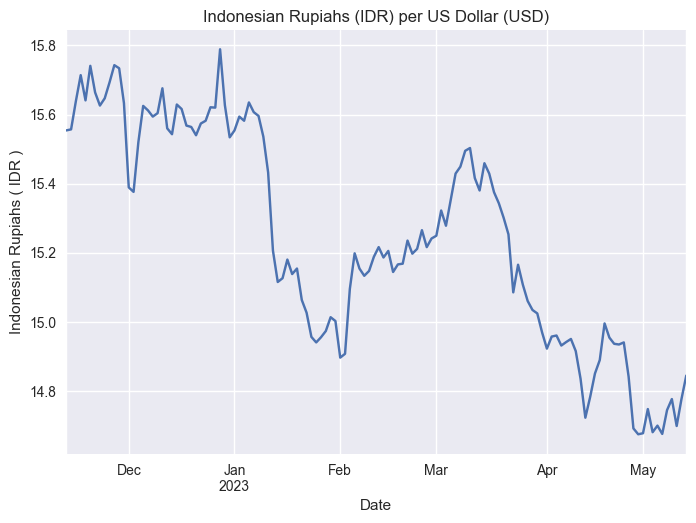

In [53]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
df.set_index('date').plot()
plt.legend().remove()
plt.title('Indonesian Rupiahs (IDR) per US Dollar (USD)')
plt.ylabel('Indonesian Rupiahs ( IDR )')
plt.xlabel('Date')
plt.show()

In [64]:
min_rate = df['exchange_rate'].min()
avg_rate = df['exchange_rate'].mean()
max_rate = df['exchange_rate'].max()
print(f"Minimum Rate: IDR {min_rate.round(3)}/USD on {df.loc[df['exchange_rate'] == min_rate, 'date'].astype(str).values}")
print(f"Average Rate: IDR {avg_rate.round(3)}/USD")
print(f"Maximal Rate: IDR {max_rate.round(3)}/USD on {df.loc[df['exchange_rate'] == max_rate, 'date'].astype(str).values}")

Minimum Rate: IDR 14.674/USD on ['2023-04-28']
Average Rate: IDR 15.241/USD
Maximal Rate: IDR 15.789/USD on ['2022-12-28']


At the end of 2022, the value of the dollar tends to rise, and was recorded as touching 15,789 IDR on December 28 2022 which was predicted due to the Russia-Ukraine war and the issue of world recession, then after entering 2023 before entering February 2023 it tends to drop to below 15,000 IDR. For the period February 2023 to April 2023, the trend chart shows a fluctuating trend. Towards May 2023 the chart continued to fall and reached its lowest point on April 28 2023 to 14,674 IDR. This was caused by the issue that several countries in the world began to abandon the dollar as their trading currency. Until the latest data on May 12 2023, the value of the dollar currency was still below 15,000 IDR.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.